# Frozen Lake Game with Q-Learning

In [29]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time
#import os    # os.system('cls')
from IPython.display import clear_output

**set up gym env**

In [30]:
import gym

create a new custom version of FrozenLake

In [31]:
from gym.envs.registration import register

try:
    register(
        id='FrozenLakeNotSlippery-v0',
        entry_point='gym-envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4', 'is_slippery':False},
        max_episode_steps=100,
        reward_threshold=0.78#, optimum=0.8196
    )
except:
    print('Already registered!')

**run env**

for example with random actions

In [21]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
env.reset()

for step in range(15):
    env.render(mode='human')#mode='human')
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    time.sleep(0.5)
    #clear_output(wait=True)
    if done:
        env.reset()

env.close()

c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


**create q-table**

In [32]:
action_size = env.action_space.n
state_size = env.observation_space.n
q_table = np.zeros([state_size, action_size])

In [23]:
q_table.shape

(16, 4)

In [24]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
# 1*10^-5
1e-5 == 0.00001 == 1*10**-5

True

In [26]:
1e5 == 100000 == 1*10**5

True

**hyperparameter**

In [33]:
# how many times the agent plays the game
EPOCHS = 20000 # Episodes

# learning rate
ALPHA = 0.8

# discount-rate
# should be a little smaller than 1
GAMMA = 0.9

In [34]:
# eploration rate
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
# reducing exploration by rate:
decay_rate = 0.001

**defining update functions**

In [35]:
def epsilon_greedy_action_selection(epsilon, q_table, discrete_state):
    random_number = np.random.random()

    # EXPLOTATION (choose the action that maximizes Q)
    if random_number > epsilon:
        
        state_row = q_table[discrete_state, :]
        action = np.argmax(state_row)

    # EXPLORATION (choose a random action)
    else:
        action = env.action_space.sample()
    return action

In [36]:
def compute_next_q_value(old_q_value, reward, next_optimal_q_value):
    return old_q_value + ALPHA * (reward + GAMMA*next_optimal_q_value - old_q_value)

In [37]:
def reduce_epsilon(epsilon, epoch):
    return min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decay_rate*epoch)
    #return epsilon -= 0.001

**agent training**

normal version:

In [33]:
rewards = []
log_interval = 1000

for episode in range(EPOCHS):
    state = env.reset()
    done = False
    total_rewards = 0

    while not done:
        # CHOOSE ACTION
        action = epsilon_greedy_action_selection(epsilon, q_table, discrete_state=state)

        # PERFORM ACTION
        new_state, reward, done, info = env.step(action)

        # OLD (current) Q VALUE
        old_q_value = q_table[state, action]

        # Get next optimal Q Value (max Q value for this state) Q(st+1, at+1)
        #           we want the value, not the action/index
        next_optimal_q_value = np.max(q_table[new_state, :])

        # Compute the next Q Value
        next_q_value = compute_next_q_value(old_q_value, reward, next_optimal_q_value)

        # Update the table
        q_table[state, action] = next_q_value

        # track rewards
        total_rewards += reward

        # new_state is now state
        state = new_state

    # agent finished a round on the game
    #episode += 1
    epsilon = reduce_epsilon(epsilon, episode)
    rewards += [total_rewards]

    if episode % log_interval == 0:
        print("Summed rewards = ", np.sum(rewards))

env.close()

Summed rewards =  0.0
Summed rewards =  272.0
Summed rewards =  980.0
Summed rewards =  1890.0
Summed rewards =  2849.0
Summed rewards =  3825.0
Summed rewards =  4813.0
Summed rewards =  5801.0
Summed rewards =  6788.0
Summed rewards =  7777.0
Summed rewards =  8761.0
Summed rewards =  9745.0
Summed rewards =  10734.0
Summed rewards =  11722.0
Summed rewards =  12710.0
Summed rewards =  13701.0
Summed rewards =  14684.0
Summed rewards =  15680.0
Summed rewards =  16672.0
Summed rewards =  17654.0


visualized version:

don't works in VSCode maybe it works in Jupyter-Labs

In [57]:
q_table = np.zeros([state_size, action_size])

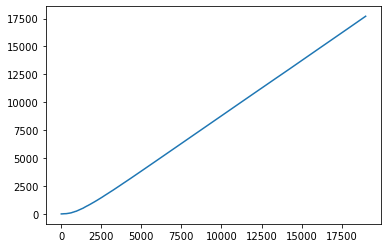

In [59]:
%matplotlib inline

rewards = []
log_interval = 1000

########################
fig = plt.figure()
axes = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
epoch_plot_tracker = []
total_reward_plot_tracker = []
########################

for episode in range(EPOCHS):
    state = env.reset()
    done = False
    total_rewards = 0

    while not done:
        # CHOOSE ACTION
        action = epsilon_greedy_action_selection(epsilon, q_table, discrete_state=state)

        # PERFORM ACTION
        new_state, reward, done, info = env.step(action)

        # OLD (current) Q VALUE
        old_q_value = q_table[state, action]

        # Get next optimal Q Value (max Q value for this state) Q(st+1, at+1)
        #           we want the value, not the action/index
        next_optimal_q_value = np.max(q_table[new_state, :])

        # Compute the next Q Value
        next_q_value = compute_next_q_value(old_q_value, reward, next_optimal_q_value)

        # Update the table
        q_table[state, action] = next_q_value

        # track rewards
        total_rewards += reward

        # new_state is now state
        state = new_state

    # agent finished a round on the game
    #episode += 1
    epsilon = reduce_epsilon(epsilon, episode)
    rewards += [total_rewards]

    ########################
    total_reward_plot_tracker += [np.sum(rewards)]
    epoch_plot_tracker += [episode]
    if episode % log_interval == 0:
        axes.clear()
        axes.plot(epoch_plot_tracker, total_reward_plot_tracker)
        fig.canvas.draw()
        fig.canvas.flush_events()
    ########################

env.close()

**use trained agent** (utilization)

In [60]:
q_table

array([[0.531441, 0.59049 , 0.59049 , 0.531441],
       [0.531441, 0.      , 0.6561  , 0.59049 ],
       [0.59049 , 0.729   , 0.59049 , 0.6561  ],
       [0.6561  , 0.      , 0.59049 , 0.59049 ],
       [0.59049 , 0.6561  , 0.      , 0.531441],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.81    , 0.      , 0.6561  ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.6561  , 0.      , 0.729   , 0.59049 ],
       [0.6561  , 0.81    , 0.81    , 0.      ],
       [0.729   , 0.9     , 0.      , 0.729   ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.81    , 0.9     , 0.729   ],
       [0.81    , 0.9     , 1.      , 0.81    ],
       [0.      , 0.      , 0.      , 0.      ]])

In [61]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
state = env.reset()

for steps in range(100):
    env.render()
    action = np.argmax(q_table[state, :])
    state, reward, done, info = env.step(action)

    time.sleep(0.5)
    # clear_output(wait=True)

    if done:
        break

env.close()

c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', rend